# Bike Sharing Demand Prediction

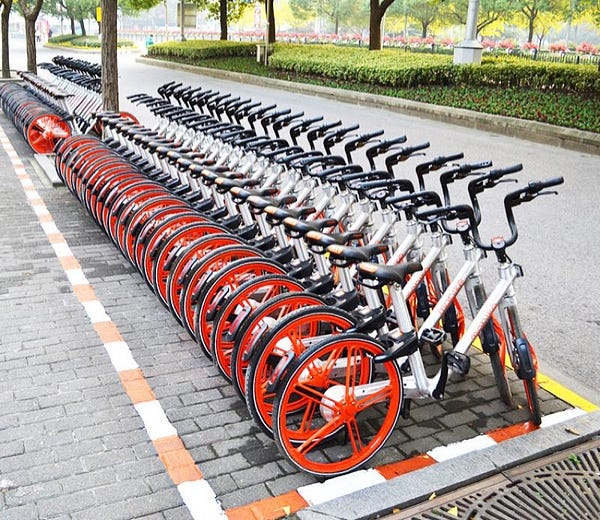
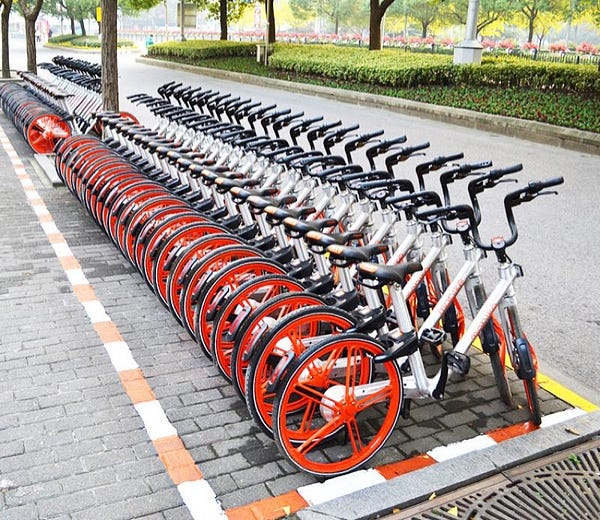

# 🚲 Bike Sharing Demand Prediction

## 📌 Introduction
Bike-sharing systems provide an efficient and eco-friendly mode of transportation in urban areas. Accurately predicting bike rental demand is crucial for optimizing fleet management and enhancing user experience. This project aims to develop a predictive model to forecast the total count of bike rentals based on historical rental data and various environmental and temporal factors.

## 🎯 Aim
The objective of this project is to **predict the total number of bikes rented (`count`) per hour** using machine learning techniques. The dataset includes various factors such as weather conditions, seasonality, and user type, which influence rental demand. By leveraging this data, we aim to build a robust model that can generalize well to unseen test data.

## 📂 Dataset Description
The dataset contains hourly bike rental data spanning **two years**. The training set consists of the first **19 days of each month**, while the test set includes the **20th to the end of each month**. The goal is to predict the hourly rental counts for the test set using only information available before the rental period.

### 🏷 Data Fields:
- `datetime` 📆 – Timestamp of rental record (hourly format)
- `season` 🍂 – Season indicator (1: Spring, 2: Summer, 3: Fall, 4: Winter)
- `holiday` 🎉 – Whether the day is a holiday (0: No, 1: Yes)
- `workingday` 💼 – Whether the day is a working day (0: No, 1: Yes)
- `weather` ☁️ – Weather condition categories:  
  - **1**: Clear, Few clouds, Partly cloudy  
  - **2**: Mist, Cloudy, Broken clouds  
  - **3**: Light Snow, Light Rain, Thunderstorm  
  - **4**: Heavy Rain, Snow, Fog  
- `temp` 🌡 – Temperature in Celsius
- `atemp` 🌡 – "Feels like" temperature in Celsius
- `humidity` 💧 – Relative humidity percentage
- `windspeed` 🍃 – Wind speed
- `casual` 🚴 – Number of non-registered user rentals
- `registered` 🏅 – Number of registered user rentals
- `count` 🔢 – Total number of bike rentals (Target variable)


In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## Import Data

In [2]:
df=pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')

## EDA (Exploratory Data Analysis)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


## Data Visualization

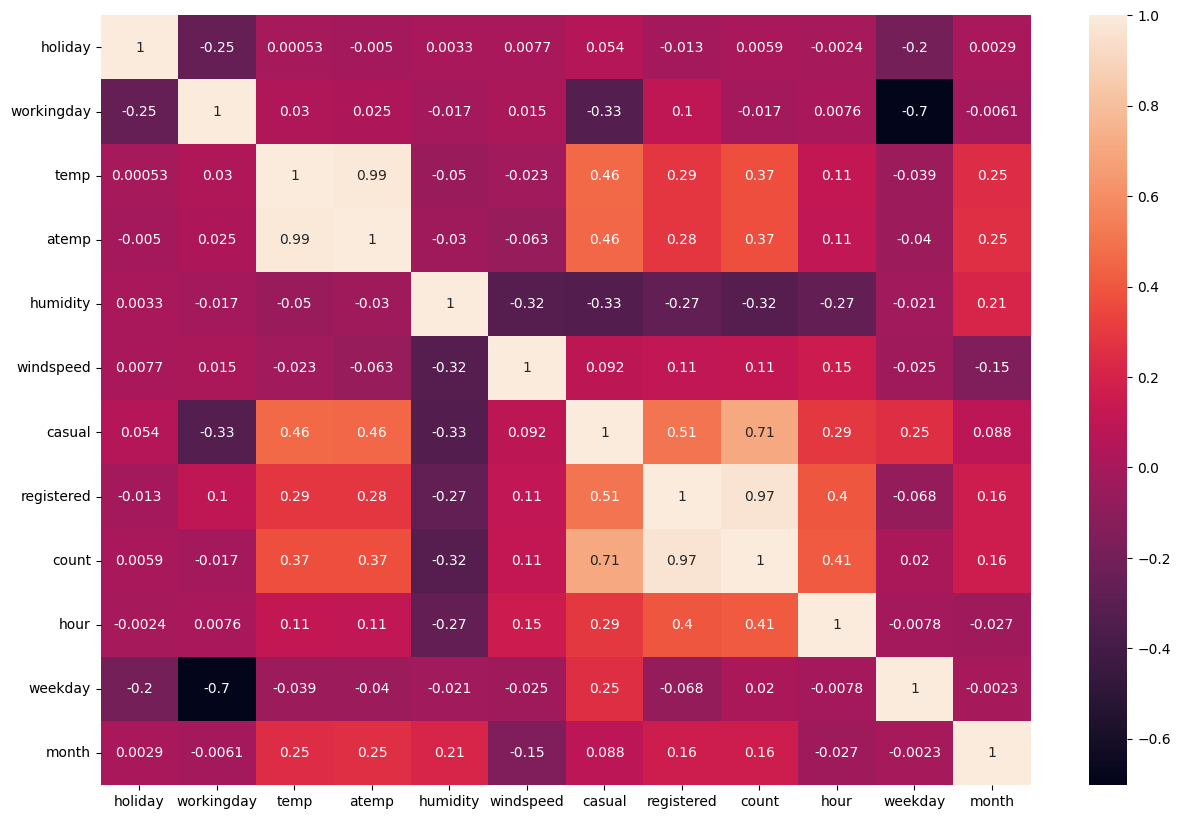

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True);

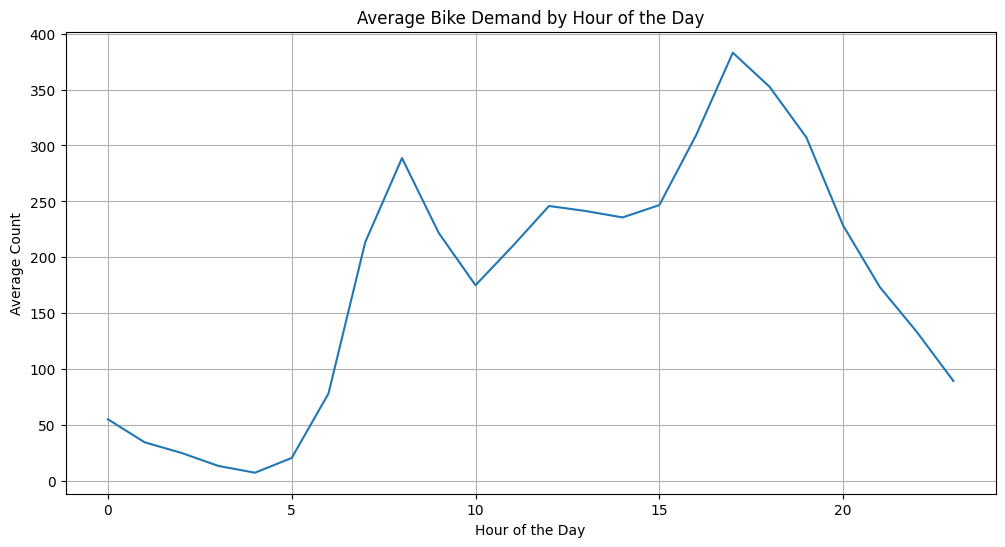

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="count", data=df, estimator="mean", ci=None)
plt.title("Average Bike Demand by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.grid(True)
plt.show();

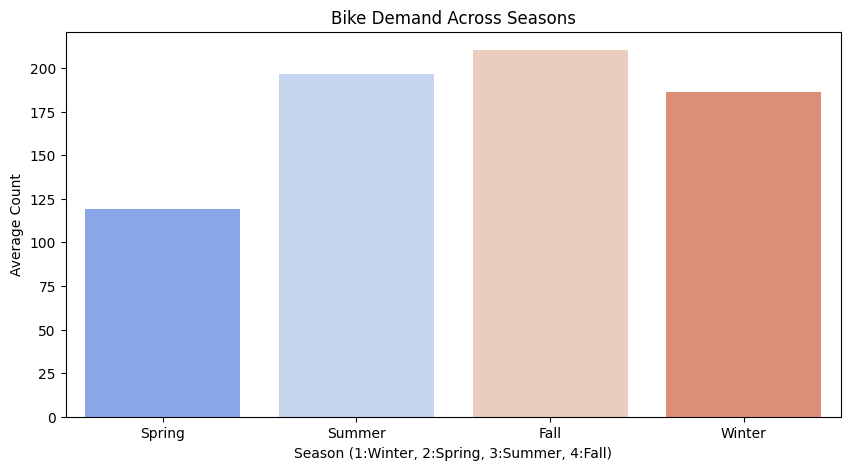

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="count", data=df, estimator="mean", ci=None, palette="coolwarm")
plt.title("Bike Demand Across Seasons")
plt.xlabel("Season (1:Winter, 2:Spring, 3:Summer, 4:Fall)")
plt.ylabel("Average Count")
plt.show()

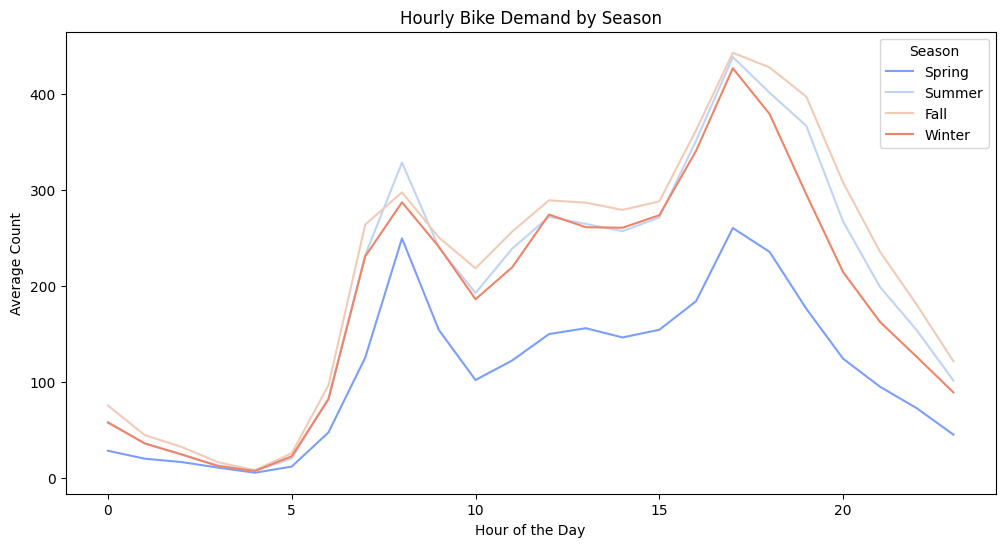

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="count", hue="season", data=df, estimator="mean", ci=None, palette="coolwarm")
plt.title("Hourly Bike Demand by Season")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.legend(title="Season")
plt.show()

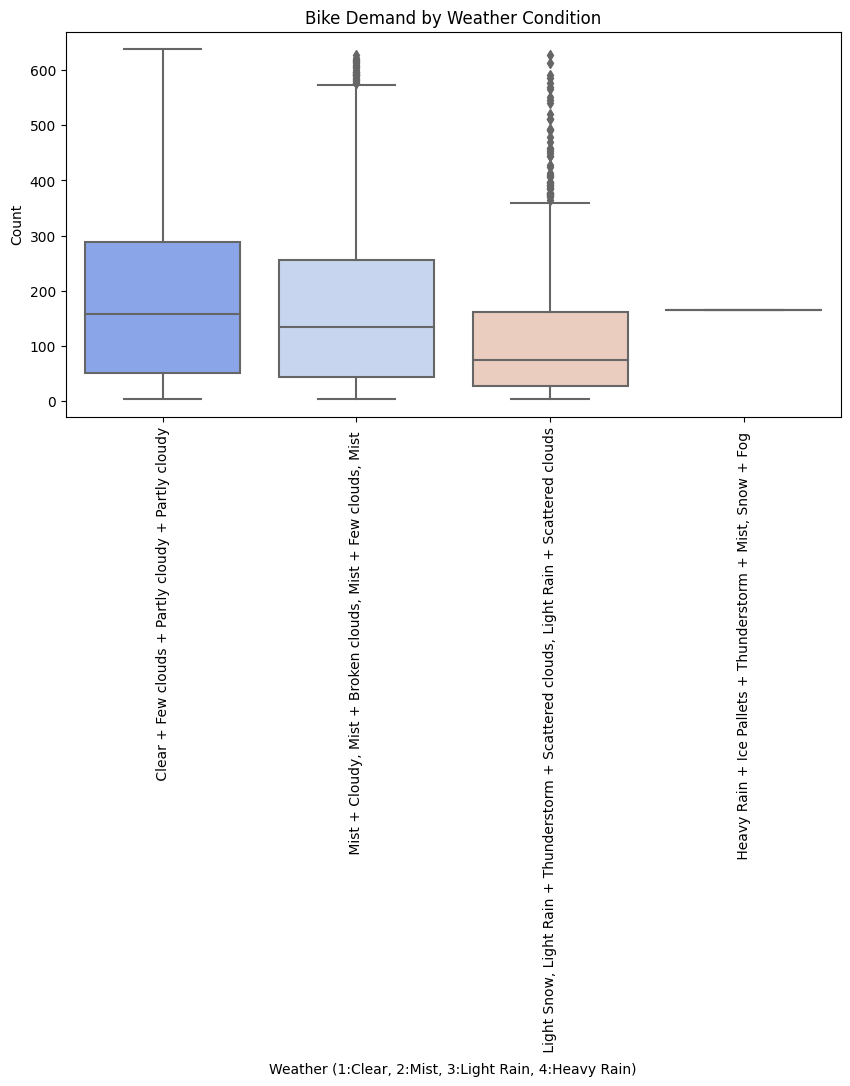

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weather", y="count", data=df, palette="coolwarm")
plt.title("Bike Demand by Weather Condition")
plt.xlabel("Weather (1:Clear, 2:Mist, 3:Light Rain, 4:Heavy Rain)")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

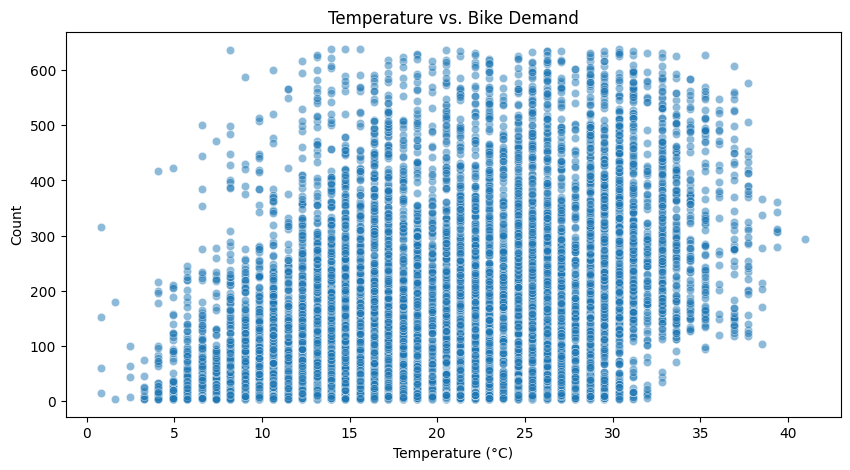

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="temp", y="count", data=df, alpha=0.5)
plt.title("Temperature vs. Bike Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

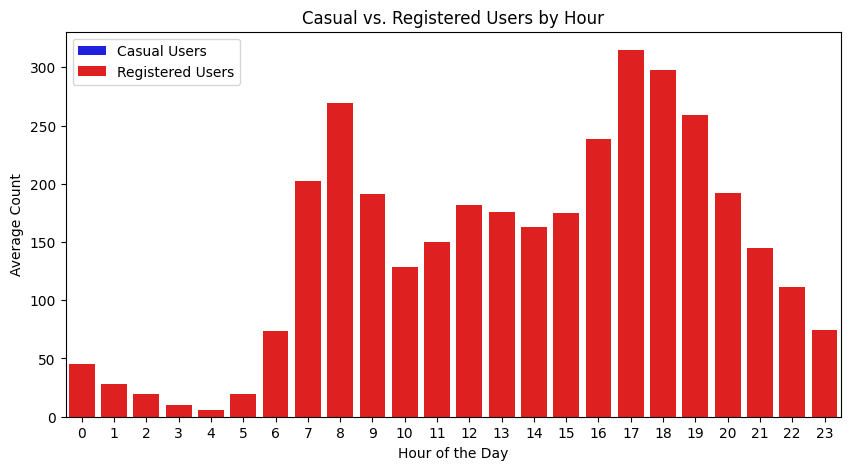

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(x="hour", y="casual", data=df, estimator="mean", ci=None, color="blue", label="Casual Users")
sns.barplot(x="hour", y="registered", data=df, estimator="mean", ci=None, color="red", label="Registered Users")
plt.title("Casual vs. Registered Users by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.legend()
plt.show()

## Feature Enginerring

In [8]:
def feature_engineering(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date'] = df['datetime'].dt.date
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday  
    df['month'] = df['datetime'].dt.month
    df["season"]=df.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
    df["weather"] = df["weather"].map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [9]:
feature_engineering(df)

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,5,1
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,5,1
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,5,1
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,5,1
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,5,1


In [11]:
lower_bound = df['count'].quantile(q=0.03)
upper_bound = df['count'].quantile(q=0.97)
df = df[(df['count'] >= lower_bound) & (df['count'] <= upper_bound)]

In [12]:
df.shape

(10323, 16)

## Modelling with Conversational Models

In [13]:
abs(df.corr(numeric_only=True)['count'].sort_values(ascending=False))

count         1.000000
registered    0.965531
casual        0.713203
hour          0.410190
temp          0.373214
atemp         0.369976
month         0.155479
windspeed     0.113096
weekday       0.020246
holiday       0.005935
workingday    0.017050
humidity      0.322624
Name: count, dtype: float64

In [14]:
x=df.drop(columns=["count","datetime","registered"],axis=1)
y=df[["count"]]

In [15]:
x.shape,y.shape

((10323, 13), (10323, 1))

In [16]:
x=pd.get_dummies(x,drop_first=True)

In [17]:
def regression_algo(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf=RandomForestRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor','Random Forest Classifier']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred.flatten()), label='Predicted', color='red', linestyle='--')
        plt.xlabel('Predicted Demand')
        plt.ylabel('Actual Demand')
        plt.title('Actual vs Predicted Demand for Best Model')
        plt.legend()
        plt.show()
    return r_table

In [18]:
regression_algo(x,y,plot=False)

,R_Squared,RMSE,MAE
XGBReggressor,0.928254,41.598987,28.403654
Random Forest Classifier,0.918351,44.376869,28.922421
Gradient Bossting,0.861609,57.774522,40.753543
DecisionTreeRegressor,0.858020,58.518936,37.290073
Extra Tree,0.820826,65.738472,39.988378
KNeighborRegressor,0.700454,84.999147,57.724068
Ridge,0.616065,96.230221,69.195378
Linear,0.613876,96.504090,69.448105
Lasso,0.608003,97.235322,69.620891
ElasticNet,0.594205,98.931758,70.267718


## Testing the Best Conversational Model

In [19]:
x=df.drop(columns=["count","datetime","registered"],axis=1)
y=df[["count"]]
x=pd.get_dummies(x,drop_first=True)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
xgb=XGBRegressor()
model=xgb.fit(x_train,y_train)

In [21]:
import joblib
joblib.dump(model, 'best_regression_model.pkl')

['best_regression_model.pkl']

In [22]:
df_test=pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

In [23]:
feature_engineering(df_test)

In [24]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month
0,2011-01-20 00:00:00,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,11.365,56,26.0027,2011-01-20,0,3,1
1,2011-01-20 01:00:00,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,13.635,56,0.0000,2011-01-20,1,3,1
2,2011-01-20 02:00:00,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,13.635,56,0.0000,2011-01-20,2,3,1
3,2011-01-20 03:00:00,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,12.880,56,11.0014,2011-01-20,3,3,1
4,2011-01-20 04:00:00,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,12.880,56,11.0014,2011-01-20,4,3,1


In [25]:
submission=pd.DataFrame({
    'datetime':df_test['datetime']
})


In [26]:
df_test = df_test.drop(columns=["datetime"], axis=1)
df_test = pd.get_dummies(df_test, drop_first=True)
df_test = df_test.reindex(columns=x_train.columns, fill_value=0)

In [27]:
predictions=model.predict(df_test)

In [28]:
submission["count"]=predictions

In [29]:
submission.loc[submission["count"] < 0, "count"] = 0

In [30]:
submission.to_csv("submission.csv",index=False)

## Feature Importance

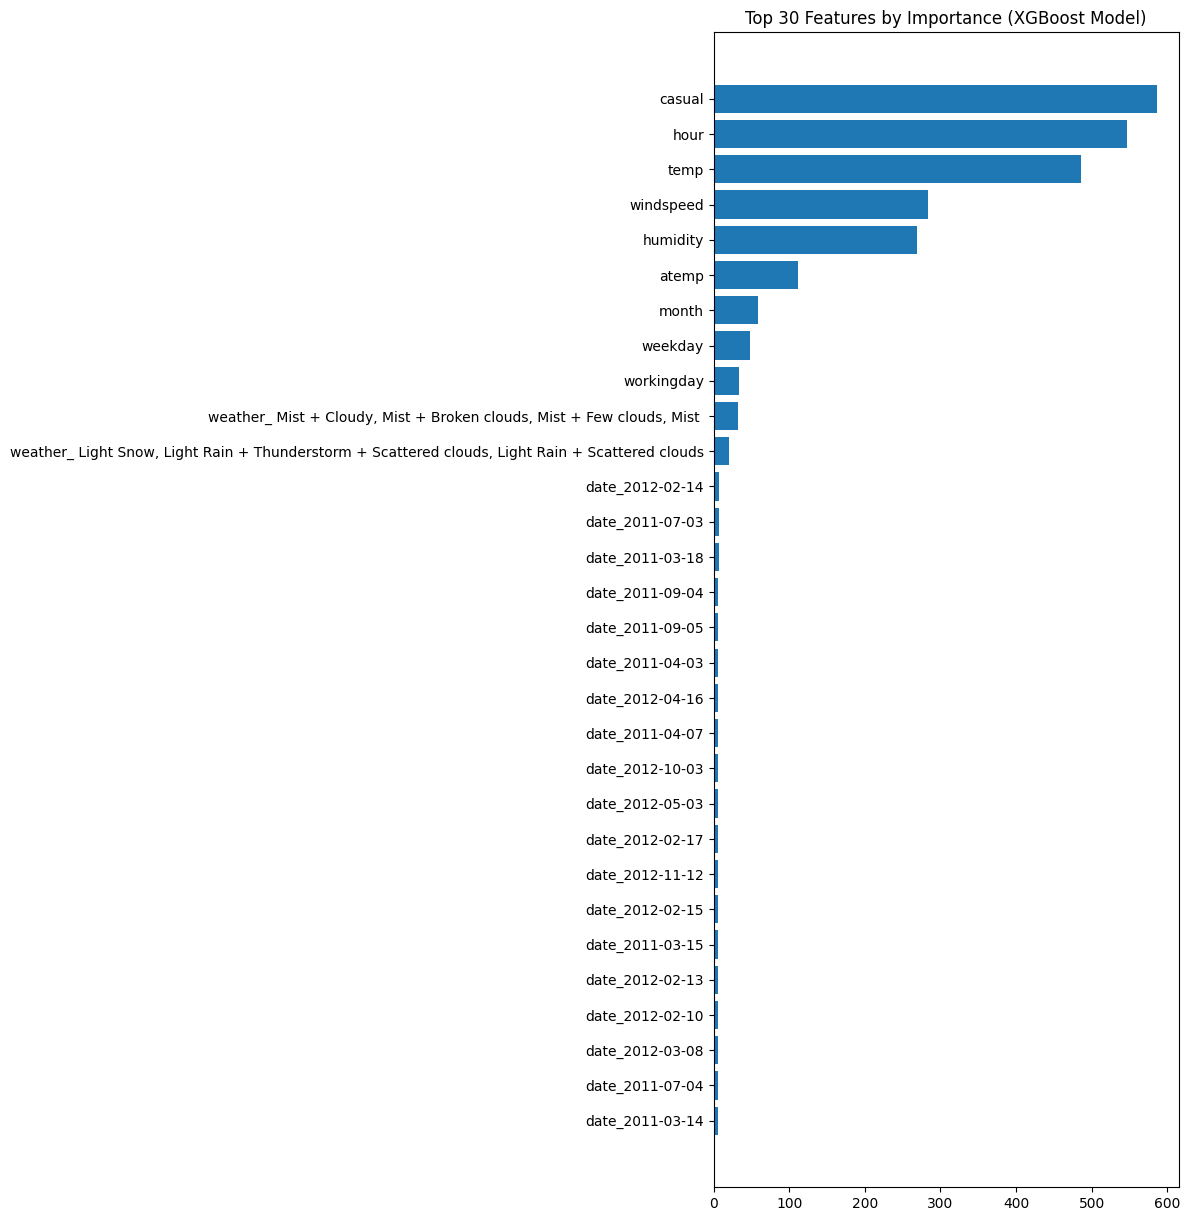

In [31]:
importance = xgb.get_booster().get_score(importance_type='weight')
feature_importance = pd.DataFrame({'Feature': list(importance.keys()), 'Importance': list(importance.values())})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(30)
plt.figure(figsize=(6, 15))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 30 Features by Importance (XGBoost Model)')
plt.show()

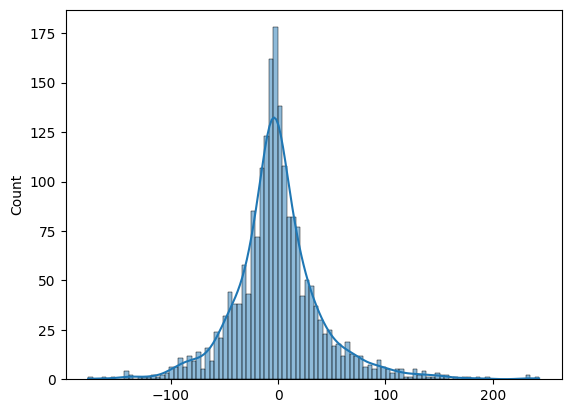

In [32]:
predictions=model.predict(x_test)
residuals = y_test.values.flatten() - predictions.flatten()
sns.histplot(residuals,bins=100,kde=True);

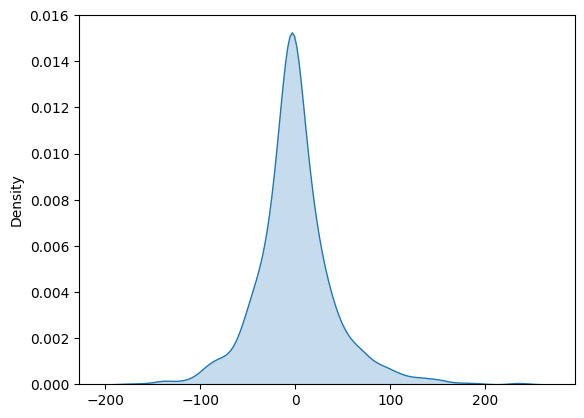

In [33]:
sns.kdeplot(x=residuals,fill=True);

## Modelling with Deep Learning

In [34]:
x=df.drop(columns=["count","datetime","registered"],axis=1)
y=df[["count"]]
x=pd.get_dummies(x,drop_first=True)

In [35]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 26241.3242 - val_loss: 9321.4932
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8647.9316 - val_loss: 8030.0571
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7838.6401 - val_loss: 7274.8486
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7177.5312 - val_loss: 6902.4326
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6992.2358 - val_loss: 6526.6992
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6076.5107 - val_loss: 6201.0615
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5801.8071 - val_loss: 6158.7256
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5538.4150 - val_loss: 6220.3628
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5164.1011 - val_loss: 6020.2632
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5183.4570 - val_loss: 6626.7876
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5184.1

In [46]:
model.save("model.h5")

In [38]:
predictions=model.predict(x_test)
r2_score(y_test,predictions)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.8916110382578625

In [39]:
type(x_test)

pandas.core.frame.DataFrame

In [40]:
mean_squared_error(y_test,predictions)**0.5

51.12991075746708

<Axes: >

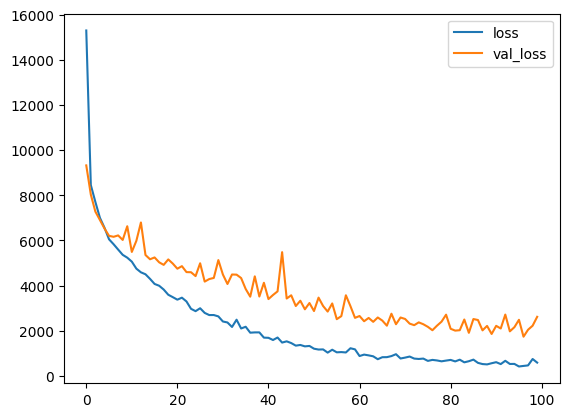

In [41]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

## Testing the deep Learning Model

In [42]:
df_test=pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
feature_engineering(df_test)
df_test = df_test.drop(columns=["datetime"], axis=1)
df_test = pd.get_dummies(df_test, drop_first=True)
df_test = df_test.reindex(columns=x_train.columns, fill_value=0)

In [43]:
predictions=model.predict(df_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [44]:
submission["count"]=predictions

In [45]:
submission.to_csv("submission.csv",index=False)

# 🏁 Conclusion

## 🔍 Summary of Model Performance
In this project, we aimed to predict the hourly bike rental demand using various machine learning and deep learning models. We evaluated the models using **R² Score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)**. The results show that **XGBoost Regressor** performed the best among all models, achieving:  

- **R² Score**: 0.9282  
- **RMSE**: 41.60  
- **MAE**: 28.40  

Other models such as **Random Forest** and **Gradient Boosting** also showed competitive performance, but were slightly less accurate. Traditional regression models like **Ridge, Linear Regression, Lasso, and ElasticNet** had lower R² scores, indicating they might not be well-suited for capturing complex relationships in the data.

## 🤖 Deep Learning Performance
Additionally, we implemented a **deep learning model**, which achieved:  

- **R² Score**: 0.8916  
- **MSE**: 51.13  

This suggests that deep learning was able to capture underlying patterns well but did not outperform **XGBoost** in this case.

## 📌 Key Takeaways
1. **XGBoost Regressor achieved the highest accuracy**, making it the best model for predicting bike rental demand.
2. **Deep learning performed well**, but did not surpass ensemble methods like XGBoost and Random Forest.
3. **Feature engineering and hyperparameter tuning played a crucial role** in improving model performance.
4. **Future improvements** could include trying advanced neural network architectures or fine-tuning hyperparameters further.

📊 Based on these findings, **XGBoost is recommended** as the final model for deployment. 🚀